In [1]:
import numpy as np
import pandas as pd
import random
import math
import statistics as stat
import matplotlib.pyplot as plt
from scipy import stats
import itertools
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import bisect
from simul_file import mmn_queueing_jsq, queue_length_time_graph, \
                        mmn_queueing_redundancy_dos, mmn_queueing_redundancy_doc, \
                        mmn_queueing_redundancy_dos_identical, \
                        mmn_queueing_redundancy_doc_identical, \
                        mmn_queueing_redundancy_dos_weibull, \
                        mmn_queueing_redundancy_doc_weibull,\
                        mmn_queueing_jsq_weibull, weibull_scale_calculator, \
                        system_compare
data1 = pd.read_excel("result_data.xlsx",sheet_name="simutime")
data2 = pd.read_excel("result_data.xlsx",sheet_name="homo")
data3 = pd.read_excel("result_data.xlsx",sheet_name="heter")

In [ ]:
mmn_queueing_jsq(n,arrival_rate,service_rate,simulation_time=60,simuseed=math.nan,policy="jsq1")
queue_length_time_graph(event_calendar,other_stat,gtype="queue",sq_no=math.nan)
mmn_queueing_redundancy_dos(n,d,arrival_rate,service_rate,simulation_time=60,simuseed=math.nan)
mmn_queueing_redundancy_doc(n,d,arrival_rate,service_rate,simulation_time=60,simuseed=math.nan)
mmn_queueing_redundancy_dos_identical(n,d,arrival_rate,service_rate,simulation_time=60,simuseed=math.nan)
mmn_queueing_redundancy_doc_identical(n,d,arrival_rate,service_rate,simulation_time=60,simuseed=math.nan)
mmn_queueing_redundancy_dos_weibull(n,d,arrival_rate,scale,shape,simulation_time=60,simuseed=math.nan)
mmn_queueing_redundancy_doc_weibull(n,d,arrival_rate,scale,shape,simulation_time=60,simuseed=math.nan)
mmn_queueing_jsq_weibull(n,arrival_rate,scale,shape,simulation_time=60,simuseed=math.nan)
weibull_scale_calculator(desired_mean,shape)
system_compare(system1,system2)

In [5]:
aaa = mmn_queueing_jsq(4,8,2.2,simulation_time=3000,simuseed=8,policy="jsq1")
bbb = mmn_queueing_redundancy_dos(4,4,8,2.2,simulation_time=3000,simuseed=8)
#ccc = mmn_queueing_redundancy_doc(4,4,8,2.2,simulation_time=1000,simuseed=8)

In [4]:
dm = 1/2.2
shp = 1
aaa = mmn_queueing_jsq_weibull(5,10,weibull_scale_calculator(dm,shp),2,simulation_time=1000,simuseed=8)

In [5]:
dm = 1/2.2
shp = 1
bbb = mmn_queueing_redundancy_dos_weibull(5,5,10,weibull_scale_calculator(dm,shp),\
                                          shp,simulation_time=1000,simuseed=8)
ccc = mmn_queueing_redundancy_doc_weibull(5,5,10,weibull_scale_calculator(dm,shp),\
                                          shp,simulation_time=1000,simuseed=8)

In [ ]:
system_compare(aaa,bbb)

In [ ]:
lb = 3
ub = 14

sys1 = np.array([])
sys2 = np.array([])
sys3 = np.array([])
for i in range(lb,ub):
    sys1 = np.append(sys1,mmn_queueing_jsq(5,i,[3,1,4,2,5],simulation_time=300,simuseed=66,policy="jsq1")[5]['Grand Average cycle time'][0])
    sys2 = np.append(sys2,mmn_queueing_redundancy_dos(5,5,i,[3,1,4,2,5],simulation_time=300,simuseed=66)[5]['Grand Average cycle time'][0])
    sys3 = np.append(sys3,mmn_queueing_redundancy_doc(5,5,i,[3,1,4,2,5],simulation_time=300,simuseed=66)[5]['Grand Average cycle time'][0])


plt.plot(np.arange(lb,ub),sys1,label='system1')
plt.plot(np.arange(lb,ub),sys2,label='system2')
plt.plot(np.arange(lb,ub),sys3,label='system3')
plt.title('Comparison of three systems')
plt.xlabel('Arrival rate')
plt.ylabel('ACT')
plt.legend()

In [36]:
aaa = mmn_queueing_jsq(5,14,[3,1,4,2,5],simulation_time=1000,simuseed=66,policy="jsq1")

In [42]:
bbb = mmn_queueing_jsq(5,15.01,[3,1,4,2,5],simulation_time=1000,simuseed=88,policy="jsq1")

How long is long?

In [44]:
aaa = mmn_queueing_jsq(4,8,2.2,simulation_time=4000,simuseed=5,policy="jsq1")

In [3]:
bbb = mmn_queueing_jsq(4,8,2.2,simulation_time=4000,simuseed=1,policy="jiq1")

In [22]:
ccc = mmn_queueing_jsq(4,8,2.2,simulation_time=4000,simuseed=2,policy="jswq")

In [30]:
ddd = mmn_queueing_redundancy_dos(4,4,8,2.2,simulation_time=4000,simuseed=4)

In [34]:
eee = mmn_queueing_redundancy_doc(4,4,8,2.2,simulation_time=4000,simuseed=2)

In [ ]:
aaa[8][aaa[8]['Finish']<2000]

In [ ]:
aaa[8]

In [48]:
def howlongislong(system1,system2,system3,system4,system5):
    
    a1 = system1[0].iloc[np.where(system1[0]["Time"][1:].to_numpy() != system1[0]["Next Customer"][:-1].to_numpy())[0][:-1]+1,:]
    b2 = system2[0].iloc[np.where(system2[0]["Time"][1:].to_numpy() != system2[0]["Next Customer"][:-1].to_numpy())[0][:-1]+1,:]
    c3 = system3[0].iloc[np.where(system3[0]["Time"][1:].to_numpy() != system3[0]["Next Customer"][:-1].to_numpy())[0][:-1]+1,:]
    d4 = system4[0].iloc[np.where(system4[0]["Time"][1:].to_numpy() != system4[0]["Next Customer"][:-1].to_numpy())[0][:-1]+1,:]
    e5 = system5[0].iloc[np.where(system5[0]["Time"][1:].to_numpy() != system5[0]["Next Customer"][:-1].to_numpy())[0][:-1]+1,:]
    
    sys1_timing = system1[8]
    sys1_timing['act'] = sys1_timing['Finish'] - sys1_timing['Start']
    sys1_timing['cma'] = sys1_timing['act'].expanding().mean()
    sys2_timing = system2[8]
    sys2_timing['act'] = sys2_timing['Finish'] - sys2_timing['Start']
    sys2_timing['cma'] = sys2_timing['act'].expanding().mean()
    sys3_timing = system3[8]
    sys3_timing['act'] = sys3_timing['Finish'] - sys3_timing['Start']
    sys3_timing['cma'] = sys3_timing['act'].expanding().mean()
    sys4_timing = system4[8]
    sys4_timing['act'] = sys4_timing['Finish'] - sys4_timing['Start']
    sys4_timing['cma'] = sys4_timing['act'].expanding().mean()
    sys5_timing = system5[8]
    sys5_timing['act'] = sys5_timing['Finish'] - sys5_timing['Start']
    sys5_timing['cma'] = sys5_timing['act'].expanding().mean()

    plt.plot(a1['Time'],sys1_timing['cma'],label='jsq')
    plt.plot(b2['Time'],sys2_timing['cma'],label='jiq')
    plt.plot(c3['Time'],sys3_timing['cma'],label='jswq')
    plt.plot(d4['Time'],sys4_timing['cma'],label='DOS')
    plt.plot(e5['Time'],sys5_timing['cma'],label='DOC')
    plt.title('ACT vs Time Graph')
    plt.xlabel('Time')
    plt.ylabel('ACT')
    plt.legend()
    

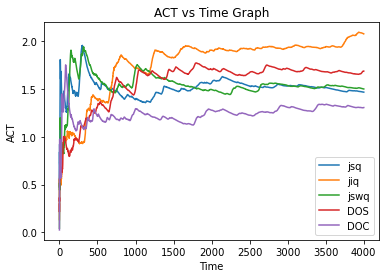

In [49]:
howlongislong(aaa,bbb,ccc,ddd,eee)

In [337]:
s1d = 30
#aaa = mmn_queueing_jsq_weibull(4,8,weibull_scale_calculator(1/2.2,0.5),0.5,simulation_time=2000,simuseed=s1d)
#bbb = mmn_queueing_redundancy_dos_weibull(4,4,8,weibull_scale_calculator(1/2.2,0.5),0.5,simulation_time=2000,simuseed=s1d)
#ccc = mmn_queueing_redundancy_doc_weibull(4,4,8,weibull_scale_calculator(1/2.2,0.5),0.5,simulation_time=2000,simuseed=s1d)
#ddd = mmn_queueing_jsq(4,8,2.2,simulation_time=4000,simuseed=s1d,policy='jiq1')
#eee = mmn_queueing_jsq(4,8,2.2,simulation_time=4000,simuseed=s1d,policy='jsq1')
fff = mmn_queueing_redundancy_doc(4,4,8,2.2,simulation_time=4000,simuseed=s1d)

In [ ]:
system_compare(fff,eee)

In [ ]:
fff[8]

In [50]:
stats.ttest_rel(data1['jsq_2000'], data1['jsq_4000'])

Ttest_relResult(statistic=0.6235277145514919, pvalue=0.53656774714141)

In [51]:
stats.ttest_rel(data1['jiq_2000'], data1['jiq_4000'])

Ttest_relResult(statistic=0.46367188623859523, pvalue=0.6454603855924186)

In [52]:
stats.ttest_rel(data1['jswq_2000'], data1['jswq_4000'])

Ttest_relResult(statistic=0.6235277145514919, pvalue=0.53656774714141)

In [53]:
stats.ttest_rel(data1['dos_2000'], data1['dos_4000'])

Ttest_relResult(statistic=-0.7595495376631464, pvalue=0.45209084262645827)

In [54]:
stats.ttest_rel(data1['doc_2000'], data1['doc_4000'])

Ttest_relResult(statistic=-0.2864186565457613, pvalue=0.7760735547786916)

In [61]:
stat.mean(data1['dos_2000'])

1.444892025

In [62]:
stat.mean(data1['dos_4000'])

1.46128565

Stability Analysis

In [64]:
#stab_sys = mmn_queueing_jsq(4,8,2.2,simulation_time=2000,simuseed=66,policy='jsq1')

In [179]:
def stab(system1,system2):
    
    a1 = system1[0].iloc[np.where(system1[0]["Time"][1:].to_numpy() != system1[0]["Next Customer"][:-1].to_numpy())[0][:-1]+1,:]
    b2 = system2[0].iloc[np.where(system2[0]["Time"][1:].to_numpy() != system2[0]["Next Customer"][:-1].to_numpy())[0][:-1]+1,:]
    
    plt.figure(1)
    plt.plot(a1['Time'],a1['Live_track'],label='stable system')
    plt.plot(b2['Time'],b2['Live_track'],label=comp_model)
    plt.xlabel('Time')
    plt.ylabel('# Customers')
    plt.legend()
    
    
#     a0pos = system1[0]['Time'].to_numpy()[np.where(system1[0]['Server1 Queue']==0)[0]]
#     b0pos = system2[0]['Time'].to_numpy()[np.where(system2[0]['Server1 Queue']==0)[0]]
#     data = [a0pos, b0pos]
#     fig, ax = plt.subplots()
#     ax.boxplot(data,vert=False)
#     ax.set_yticklabels(['Stable system', comp_model])
#     ax.set_xlabel('Simulation Time')
#     plt.show()
    
    #plt.savefig('my_plot.jpg')
    

In [200]:
comp_model = 'DOC'
#aaa = mmn_queueing_jsq_weibull(4,8,scl_dec,0.5,simulation_time=2000,simuseed=1)
bbb = mmn_queueing_redundancy_doc_weibull(4,4,8,scl_dec,0.5,simulation_time=2000,simuseed=1)
#ccc = mmn_queueing_redundancy_doc_weibull(4,4,8,scl_dec,0.5,simulation_time=2000,simuseed=1)
#ddd = mmn_queueing_jsq(4,8,[1.5,2,4,1],simulation_time=2000,simuseed=1,policy=comp_model)
#eee = mmn_queueing_jsq(4,8,2.2,simulation_time=2000,simuseed=s1d,policy=comp_model)
#fff = mmn_queueing_redundancy_doc_identical(4,4,8,[1.5,2,4,1],simulation_time=2000,simuseed=1)

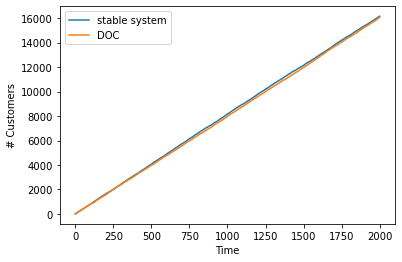

In [201]:
stab(stab_sys,bbb)

Homo

In [831]:
s1d = 13
#aaa = mmn_queueing_jsq_weibull(4,8,weibull_scale_calculator(1/2.2,0.5),0.5,simulation_time=2000,simuseed=s1d)
#bbb = mmn_queueing_redundancy_dos_weibull(4,4,8,weibull_scale_calculator(1/2.2,0.5),0.5,simulation_time=2000,simuseed=s1d)
ccc = mmn_queueing_redundancy_doc_weibull(4,4,8,weibull_scale_calculator(1/2.2,0.5),0.5,simulation_time=2000,simuseed=s1d)

In [ ]:
system_compare(ccc,ddd)

In [ ]:
ccc[8]

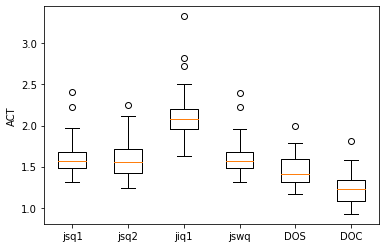

In [210]:
fig, ax = plt.subplots()
ax.boxplot(data2.iloc[:,:6])
ax.set_xticklabels(['jsq1','jsq2','jiq1','jswq','DOS','DOC'])
ax.set_ylabel('ACT')
plt.show()

In [212]:
abcde = data2.iloc[:,:6]
abcde.columns = ['jsq1','jsq2','jiq','jswq','DOS','DOC']

In [214]:
abcde.describe().round(3)

,jsq1,jsq2,jiq,jswq,DOS,DOC
count,40.000,40.000,40.000,40.000,40.000,40.000
mean,1.614,1.600,2.126,1.613,1.445,1.232
std,0.231,0.236,0.320,0.230,0.186,0.200
min,1.315,1.235,1.631,1.315,1.167,0.925
25%,1.478,1.423,1.958,1.478,1.318,1.080
50%,1.564,1.562,2.080,1.563,1.408,1.226
75%,1.677,1.712,2.207,1.677,1.591,1.333
max,2.402,2.248,3.329,2.400,2.000,1.815


Hetero

In [170]:
scl_inc = [weibull_scale_calculator(1/1.5,2),weibull_scale_calculator(1/2,2),\
           weibull_scale_calculator(1/4,2),weibull_scale_calculator(1/1,2)]

scl_dec = [weibull_scale_calculator(1/1.5,0.5),weibull_scale_calculator(1/2,0.5),\
           weibull_scale_calculator(1/4,0.5),weibull_scale_calculator(1/1,0.5)]

In [750]:
s1d = 40
aaa = mmn_queueing_jsq_weibull(4,8,scl_dec,0.5,simulation_time=2000,simuseed=s1d)
bbb = mmn_queueing_redundancy_dos_weibull(4,4,8,scl_dec,0.5,simulation_time=2000,simuseed=s1d)
#ccc = mmn_queueing_redundancy_doc_weibull(4,4,8,scl_dec,0.5,simulation_time=2000,simuseed=s1d)
#ddd = mmn_queueing_jsq(4,8,[1.5,2,4,1],simulation_time=2000,simuseed=s1d,policy='jsq2')
#eee = mmn_queueing_jsq(4,8,2.2,simulation_time=2000,simuseed=s1d,policy='jsq1')
#fff = mmn_queueing_redundancy_dos_identical(4,4,8,[1.5,2,4,1],simulation_time=2000,simuseed=s1d)

In [ ]:
system_compare(aaa,bbb)

In [ ]:
aaa[8]

In [ ]:
bbb[8]